In [1]:
import numpy as np
import pandas as pd
import pyvista as pv
import matplotlib.pyplot as plt
import os

from skimage.transform import resize
from scipy.io import loadmat, savemat

In [2]:
df = loadmat('geomodel_data/ti.mat')['Facies']
print(df.shape)

(318, 524288)


***

In [11]:
path = 'C:/Users/Misael Morales/OneDrive - The University of Texas at Austin/DiReCT Research/MLTrainingImages'
facies_maps = np.ndarray(shape=(318,128*128*32))
i = 0

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.mat'):
            fullfile = os.path.join(root, file)
            data = loadmat(fullfile)['Facies'].reshape(128,256,256).T
            resz = resize(data, (128,128,32), anti_aliasing=True).T.reshape(-1,1)
            norm = np.round(np.unique(data)[-1]*(resz-resz.min())/(resz.max()-resz.min()))
            facies_maps[i] = np.squeeze(norm)
            i += 1
print(facies_maps.shape)
print(facies_maps.min(), facies_maps.max())

(318, 524288)
0.0 5.0


In [12]:
mdic = {"Label":"TI", "Facies":facies_maps}
savemat('geomodel_data/ti.mat', mdic)

***

In [5]:
def read_data(research, parent, file_address):
    df = pd.read_csv(os.path.join(research, os.path.join(parent, file_address)))
    df_cube = np.array(df).reshape(256,256,128)
    return df_cube

def plot_samples(data1, data2, data3, window=(900,300)):
    p = pv.Plotter(shape=(1,3))
    p.subplot(0,0); p.add_text('Low Sinuosity');    p.add_mesh(np.flip(data1))
    p.subplot(0,1); p.add_text('Medium Sinuosity'); p.add_mesh(np.flip(data2))
    p.subplot(0,2); p.add_text('High Sinuosity');   p.add_mesh(np.flip(data3))
    p.show(jupyter_backend='static', window_size=window)

def plot_slices(data1, data2, data3, multiplier=11):
    fig, axs = plt.subplots(3, 10, figsize=(25,6), facecolor='white')
    for i in range(10):
        k = i*multiplier
        axs[0,i].imshow(data1[...,k]); axs[0,i].set_title('Slice {}'.format(k))
        axs[1,i].imshow(data2[...,k])
        axs[2,i].imshow(data3[...,k])
    plt.show()

Unique Facies [0 1 2 3]


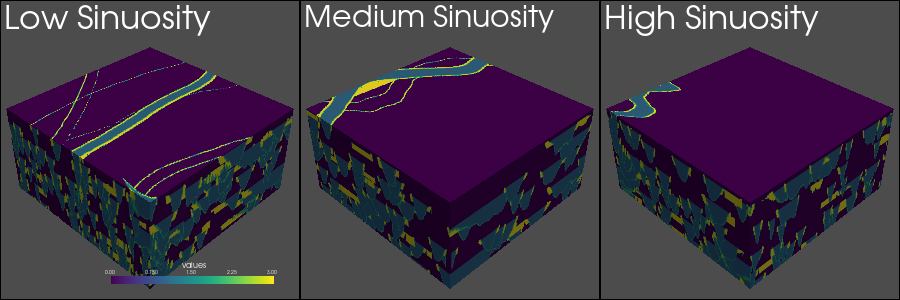

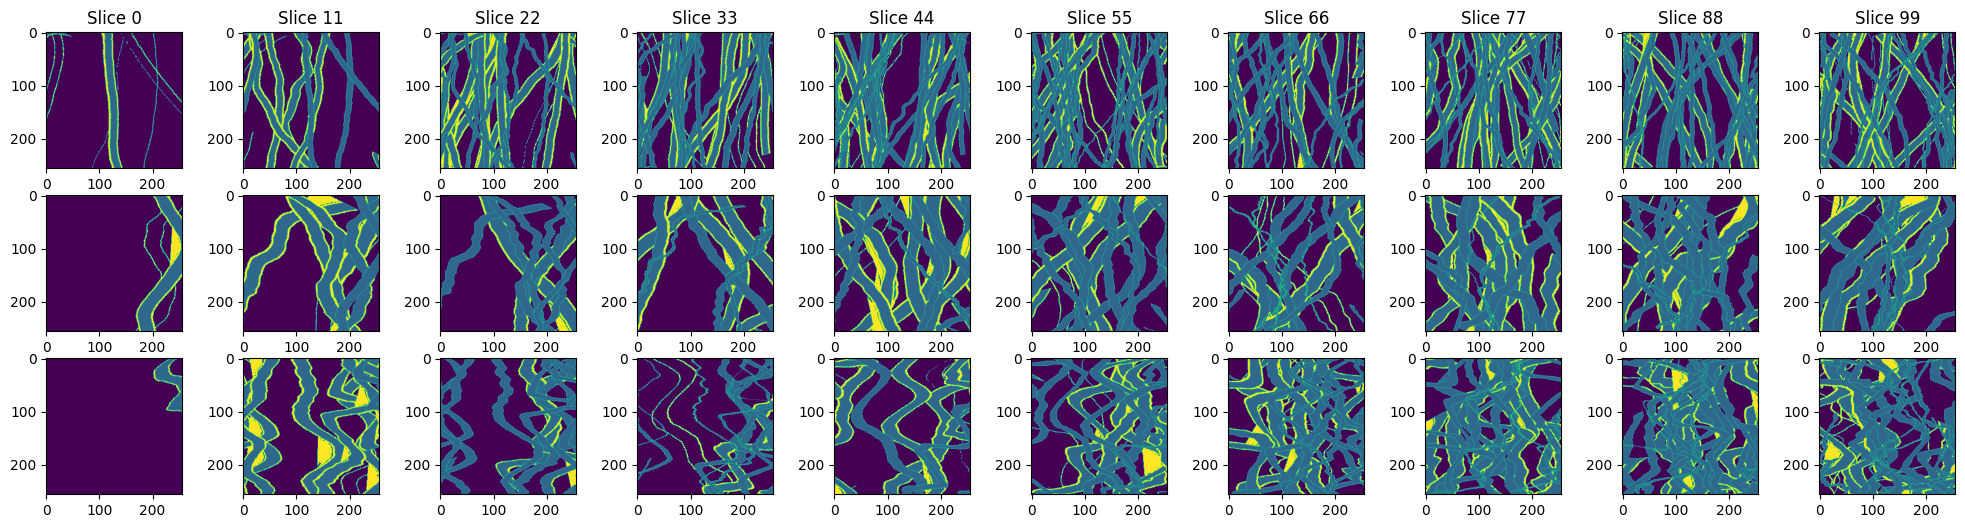

In [17]:
#Fluvsim Channel
research_dir = 'C:/Users/Misael Morales/OneDrive - The University of Texas at Austin/DiReCT Research/MLTrainingImages'
parent_dir   = 'Fluvsim/Levee/NTG_0.6'

low  = read_data(research_dir, parent_dir, 'SmallLeveeWT_50Low_Sinuosity.csv')
med  = read_data(research_dir, parent_dir, 'SmallLeveeWT_100Low_Sinuosity.csv')
high = read_data(research_dir, parent_dir, 'SmallLeveeWT_100Med_Sinuosity.csv')
print('Unique Facies', np.unique(low))
plot_samples(low, med, high)
plot_slices(low, med, high)

***
# END